In [ ]:
import pandas as pd
import numpy as np
import io
import string
from sklearn.cluster import KMeans

In [ ]:
data = """Object,X,Y,Cluster
1, 6, 10, 0
2, 17, 5, 1
3, 17, 4, 2
4, 17, 16, 1
5, 11, 4, 2
6, 14, 6, 2
7, 15, 12, 0
8, 1, 1, 2
9, 3, 4, 0
10, 10, 17, 1
11, 6, 19, 2
12, 18, 12, 0
13, 10, 16, 0
14, 9, 3, 2
15, 12, 14, 2"""

In [ ]:
df = pd.read_csv(io.StringIO(data), index_col='Object')

In [ ]:
coords = df.drop('Cluster', axis=1)

In [ ]:
kmeans = KMeans(n_clusters=3, init=np.array([[10.4, 10.8], [14.67, 12.67], [10.0, 7.29]]), max_iter=100, n_init=1)

In [ ]:
model = kmeans.fit(coords)

In [ ]:
model

KMeans(init=array([[10.4 , 10.8 ],
       [14.67, 12.67],
       [10.  ,  7.29]]),
       max_iter=100, n_clusters=3, n_init=1)

In [ ]:
model.labels_.tolist()

[0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1]

In [ ]:
alldistances = kmeans.fit_transform(coords)
alldistances

array([[ 5.85234996, 10.12422837,  7.49012956],
       [13.82931669,  8.63133825,  6.81085568],
       [14.60308187,  9.61769203,  6.7158053 ],
       [ 9.01387819,  2.91547595, 13.87554007],
       [11.88486432, 10.51189802,  0.72843136],
       [11.23610253,  7.64852927,  4.28809458],
       [ 7.82623792,  1.58113883,  9.40907074],
       [16.10124219, 19.14418972,  9.71533608],
       [12.5399362 , 15.70031847,  7.28711471],
       [ 2.5       ,  6.51920241, 13.14596237],
       [ 4.03112887, 10.9772492 , 15.73764498],
       [10.59481005,  2.91547595, 11.21678771],
       [ 2.06155281,  6.04152299, 12.14621802],
       [12.5399362 , 12.34908904,  1.54523626],
       [ 4.27200187,  3.53553391, 10.2867063 ]])

In [ ]:
model.cluster_centers_

array([[ 8.        , 15.5       ],
       [15.5       , 13.5       ],
       [10.28571429,  3.85714286]])

In [ ]:
# Using enumerate to Find Index Positions
a_list = model.labels_.tolist()
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(a_list):
        if value == item_to_find:
            indices.append(idx)
    return indices

print(find_indices(a_list, 0))

[0, 9, 10, 12]


In [ ]:
! pip install --quiet scikit-image

(512, 512, 3)

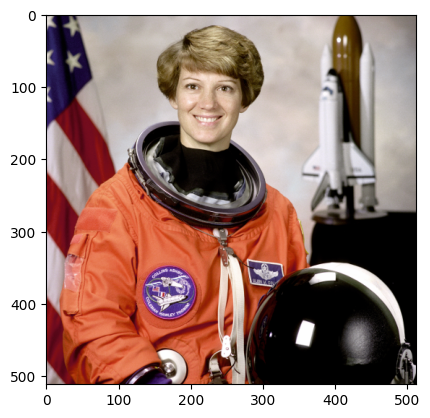

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import data
img = data.astronaut()
plt.imshow(img)
img.shape

In [ ]:
img_shape = img.shape
X = img.reshape((img_shape[0]*img_shape[1]) ,3)
X.shape

(262144, 3)

In [ ]:
color_count = len(np.unique(X,axis=0))
color_count

113382

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=32)
kmeans = model.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.labels_.shape

(262144,)

In [ ]:
unique_values = np.unique(kmeans.labels_)
unique_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int32)

In [ ]:
kmeans.cluster_centers_[0]

array([54.86930735, 47.40987079, 42.40711714])

In [ ]:
X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed

array([[158.07349308, 147.85375494, 146.10573123],
       [110.56933759, 101.96359542, 100.65340589],
       [ 49.86827712,  35.023701  ,  91.15542388],
       ...,
       [  1.78089943,   0.89803067,   0.9017048 ],
       [  1.78089943,   0.89803067,   0.9017048 ],
       [  1.78089943,   0.89803067,   0.9017048 ]])

In [ ]:
kmeans.labels_

array([10,  4, 17, ...,  3,  3,  3], dtype=int32)

In [ ]:
X_compressed = X_compressed.astype(dtype='uint8')

In [ ]:
len(np.unique(X_compressed, axis=0))

32

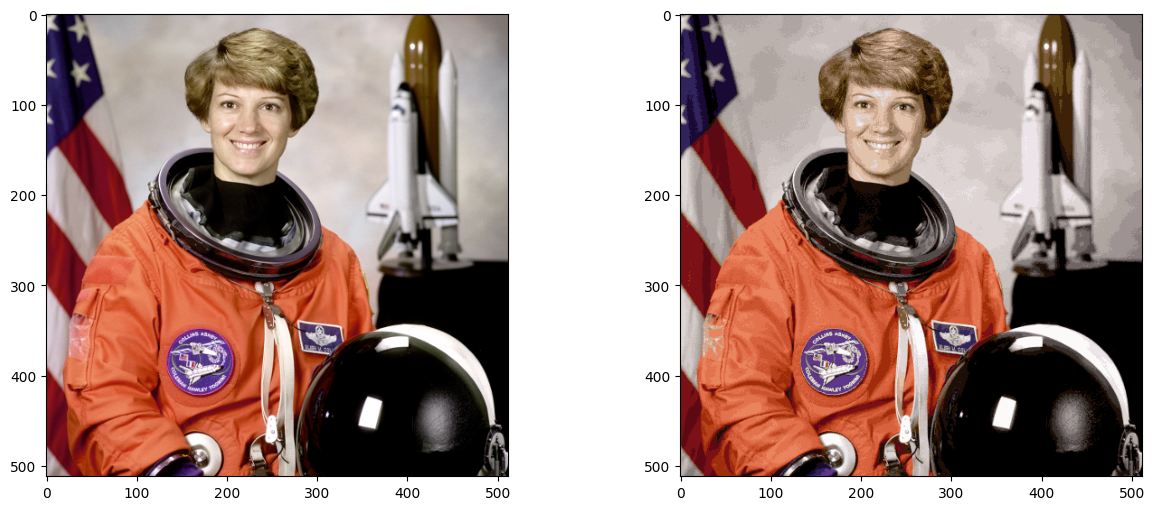

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].imshow(img)
axs[1].imshow(X_compressed.reshape((512, 512, 3)))